<a href="https://colab.research.google.com/github/Void3604/MLlab/blob/main/Q11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

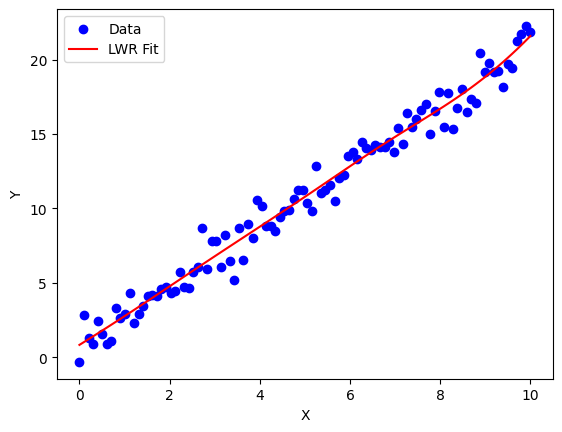

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sample_data(n=100):
    x = np.linspace(0, 10, n)
    y = 2 * x + 1 + np.random.normal(0, 1, n)
    return x, y

def compute_weights(x_query, X, tau):
    m = len(X)
    weights = np.exp(- (X - x_query) ** 2 / (2 * tau ** 2))
    W = np.diag(weights)
    return W

def locally_weighted_regression(X, y, x_query, tau=1.0):
    W = compute_weights(x_query, X, tau)
    X_b = np.vstack([np.ones(len(X)), X]).T
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)
    return np.array([1, x_query]) @ theta

x, y = generate_sample_data()

tau = 1.0
predictions = [locally_weighted_regression(x, y, x_query, tau) for x_query in x]

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, predictions, color='red', label='LWR Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
